In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import numpy as np

In [12]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print('x_train shape: ',x_train.shape)
print('x_train test: ',x_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_train test:  (10000, 32, 32, 3)


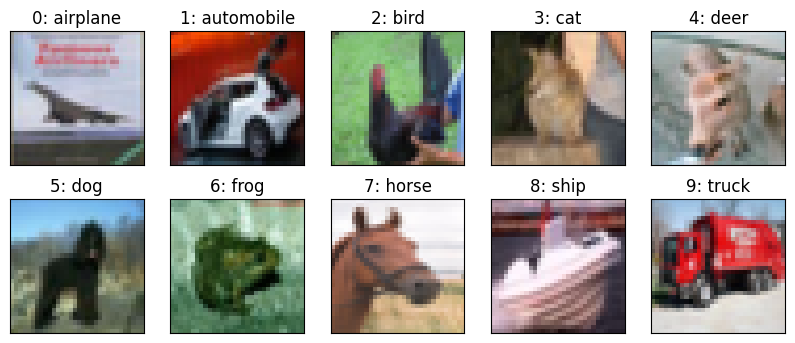

In [14]:
import matplotlib.pyplot as plt
import numpy as np
(_, _), (_, labels) = cifar10.load_data()
idx = [3, 6, 25, 46, 58, 85, 93, 99, 108, 133]
clsmap = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4: 'deer',
    5: 'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}
plt.figure(figsize = (10,4))
for i, (img, y) in enumerate(zip(x_test[idx].reshape(10,32,32,3), labels[idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img,cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y[0]) + ": "+ clsmap[y[0]])
plt.show()

In [15]:
model1 = models.Sequential()


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

#dimensionality of input and latent encoded representations
inpt_dim = (32,32,3)
inpt_img= Input(shape=inpt_dim)
#Convolutional layer
c11 = Conv2D(64,(9,9), strides=(2,2), input_shape = inpt_dim, activation='relu')(inpt_img)
#Pooling and BatchNorm
p12 = MaxPooling2D(pool_size = (2,2))(c11)
bn13 = BatchNormalization()(p12)

# Add a second convolutional layer
c14 = Conv2D(128,(3,3), strides=(1,1), activation='relu')(bn13)
p15 = MaxPooling2D(pool_size = (2,2))(c14)
bn16 = BatchNormalization()(p15)

# Flattening for compatibility
f17 = Flatten()(bn16)
#Dense layers+ Dropout
do18 = Dropout(0.5)(f17)
d19 = Dense(units = 256,activation = 'relu')(do18)
do110 = Dropout(0.2)(d19)
d111 = Dense(units = 64, activation = 'relu')(do110)
do112 = Dropout(0.1)(d111)
output= Dense(units = 10, activation='sigmoid')(do112)

classifier = Model(inpt_img, output)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
opt = RMSprop(learning_rate=0.001)
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
print(classifier.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        15,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,666 (932.29 KB)

 Trainable params: 238,282 (930.79 KB)

 Non-trainable params: 384 (1.50 KB)

None


In [18]:
# Fitting the CNN to the images
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35,
                         restore_best_weights=True, verbose=1)

checkpoint_filepath = 'cnn_model.h5'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

hist = classifier.fit(x_train, y_train, batch_size=512, epochs=10,
                   callbacks=[stop_alg, reduce_lr, model_checkpoint], shuffle=True,
                   validation_data=(x_test, y_test))


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.2389 - loss: 0.3653

98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 353ms/step - accuracy: 0.2395 - loss: 0.3648 - val_accuracy: 0.2196 - val_loss: 0.3621 - learning_rate: 0.0010
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.3950 - loss: 0.2575

98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - accuracy: 0.3952 - loss: 0.2575 - val_accuracy: 0.2230 - val_loss: 0.3215 - learning_rate: 0.0010
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.4526 - loss: 0.2362

98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 349ms/step - accuracy: 0.4527 - loss: 0.2362 - val_accuracy: 0.3733 - val_loss: 0.2637 - learning_rate: 0.0010
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.5037 - loss: 0.2201

98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 367ms/step - accuracy: 0.5037 - loss: 0.2201 - val_accuracy: 0.3802 - val_loss: 0.2665 - learning_rate: 0.0010
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.5246 - loss: 0.2114

98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 355ms/step - accuracy: 0.5246 - loss: 0.2114 - val_accuracy: 0.4365 - val_loss: 0.2437 - learning_rate: 0.0010
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 347ms/step - accuracy: 0.5475 - loss: 0.2026 - val_accuracy: 0.3494 - val_loss: 0.3010 - learning_rate: 0.0010
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5665 - loss: 0.1962

98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 376ms/step - accuracy: 0.5665 - loss: 0.1962 - val_accuracy: 0.4802 - val_loss: 0.2264 - learning_rate: 0.0010
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 365ms/step - accuracy: 0.5817 - loss: 0.1899 - val_accuracy: 0.3976 - val_loss: 0.3027 - learning_rate: 0.0010
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 371ms/step - accuracy: 0.5929 - loss: 0.1851 - val_accuracy: 0.4243 - val_loss: 0.2768 - learning_rate: 0.0010
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - accuracy: 0.6058 - loss: 0.1803 - val_accuracy: 0.3936 - val_loss: 0.2809 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 7.


In [19]:
classifier.save_weights("cnn1.weights.h5")


In [20]:
classifier.load_weights('cnn1.weights.h5')

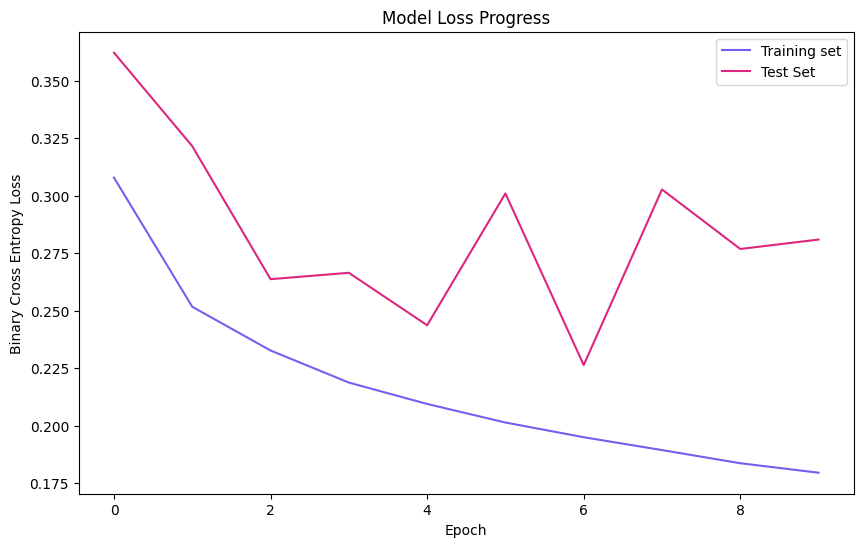

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training set','Test Set'], loc='upper right')
plt.show()

In [24]:
from tensorflow.keras.models import load_model

#classifier = load_model('ccn_model.h5')
#classifier = load_model('cnn.hdf5')

#classifier.load_weights('cnn.hdf5')
classifier.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np
(_, _),(_, labels) = cifar10.load_data()
y_ = labels
y_hat = classifier.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)

print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_hat, axis=1), labels=[0,1,2,3,4,5,6,7,8,9]))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1), labels=[0,1,2,3,4,5,6,7,8,9])
print(cm)

ber = 1-balanced_accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))
print('BER', ber)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.68      0.54      0.60      1000
           1       0.63      0.58      0.61      1000
           2       0.63      0.26      0.36      1000
           3       0.56      0.11      0.19      1000
           4       0.72      0.21      0.33      1000
           5       0.50      0.48      0.49      1000
           6       0.50      0.71      0.59      1000
           7       0.54      0.60      0.57      1000
           8       0.83      0.38      0.52      1000
           9       0.27      0.92      0.42      1000

    accuracy                           0.48     10000
   macro avg       0.59      0.48      0.47     10000
weighted avg       0.59      0.48      0.47     10000

[[536  57  37   2   2   6  15  12  35 298]
 [  2 585   0   0   0   1  10   3   2 397]
 [ 71  29 255  21  30 109 210  90  10 175]
 [ 16  31  27 114  14 226 142  81   7 342]
 [ 31  31  40   7 211  64 2

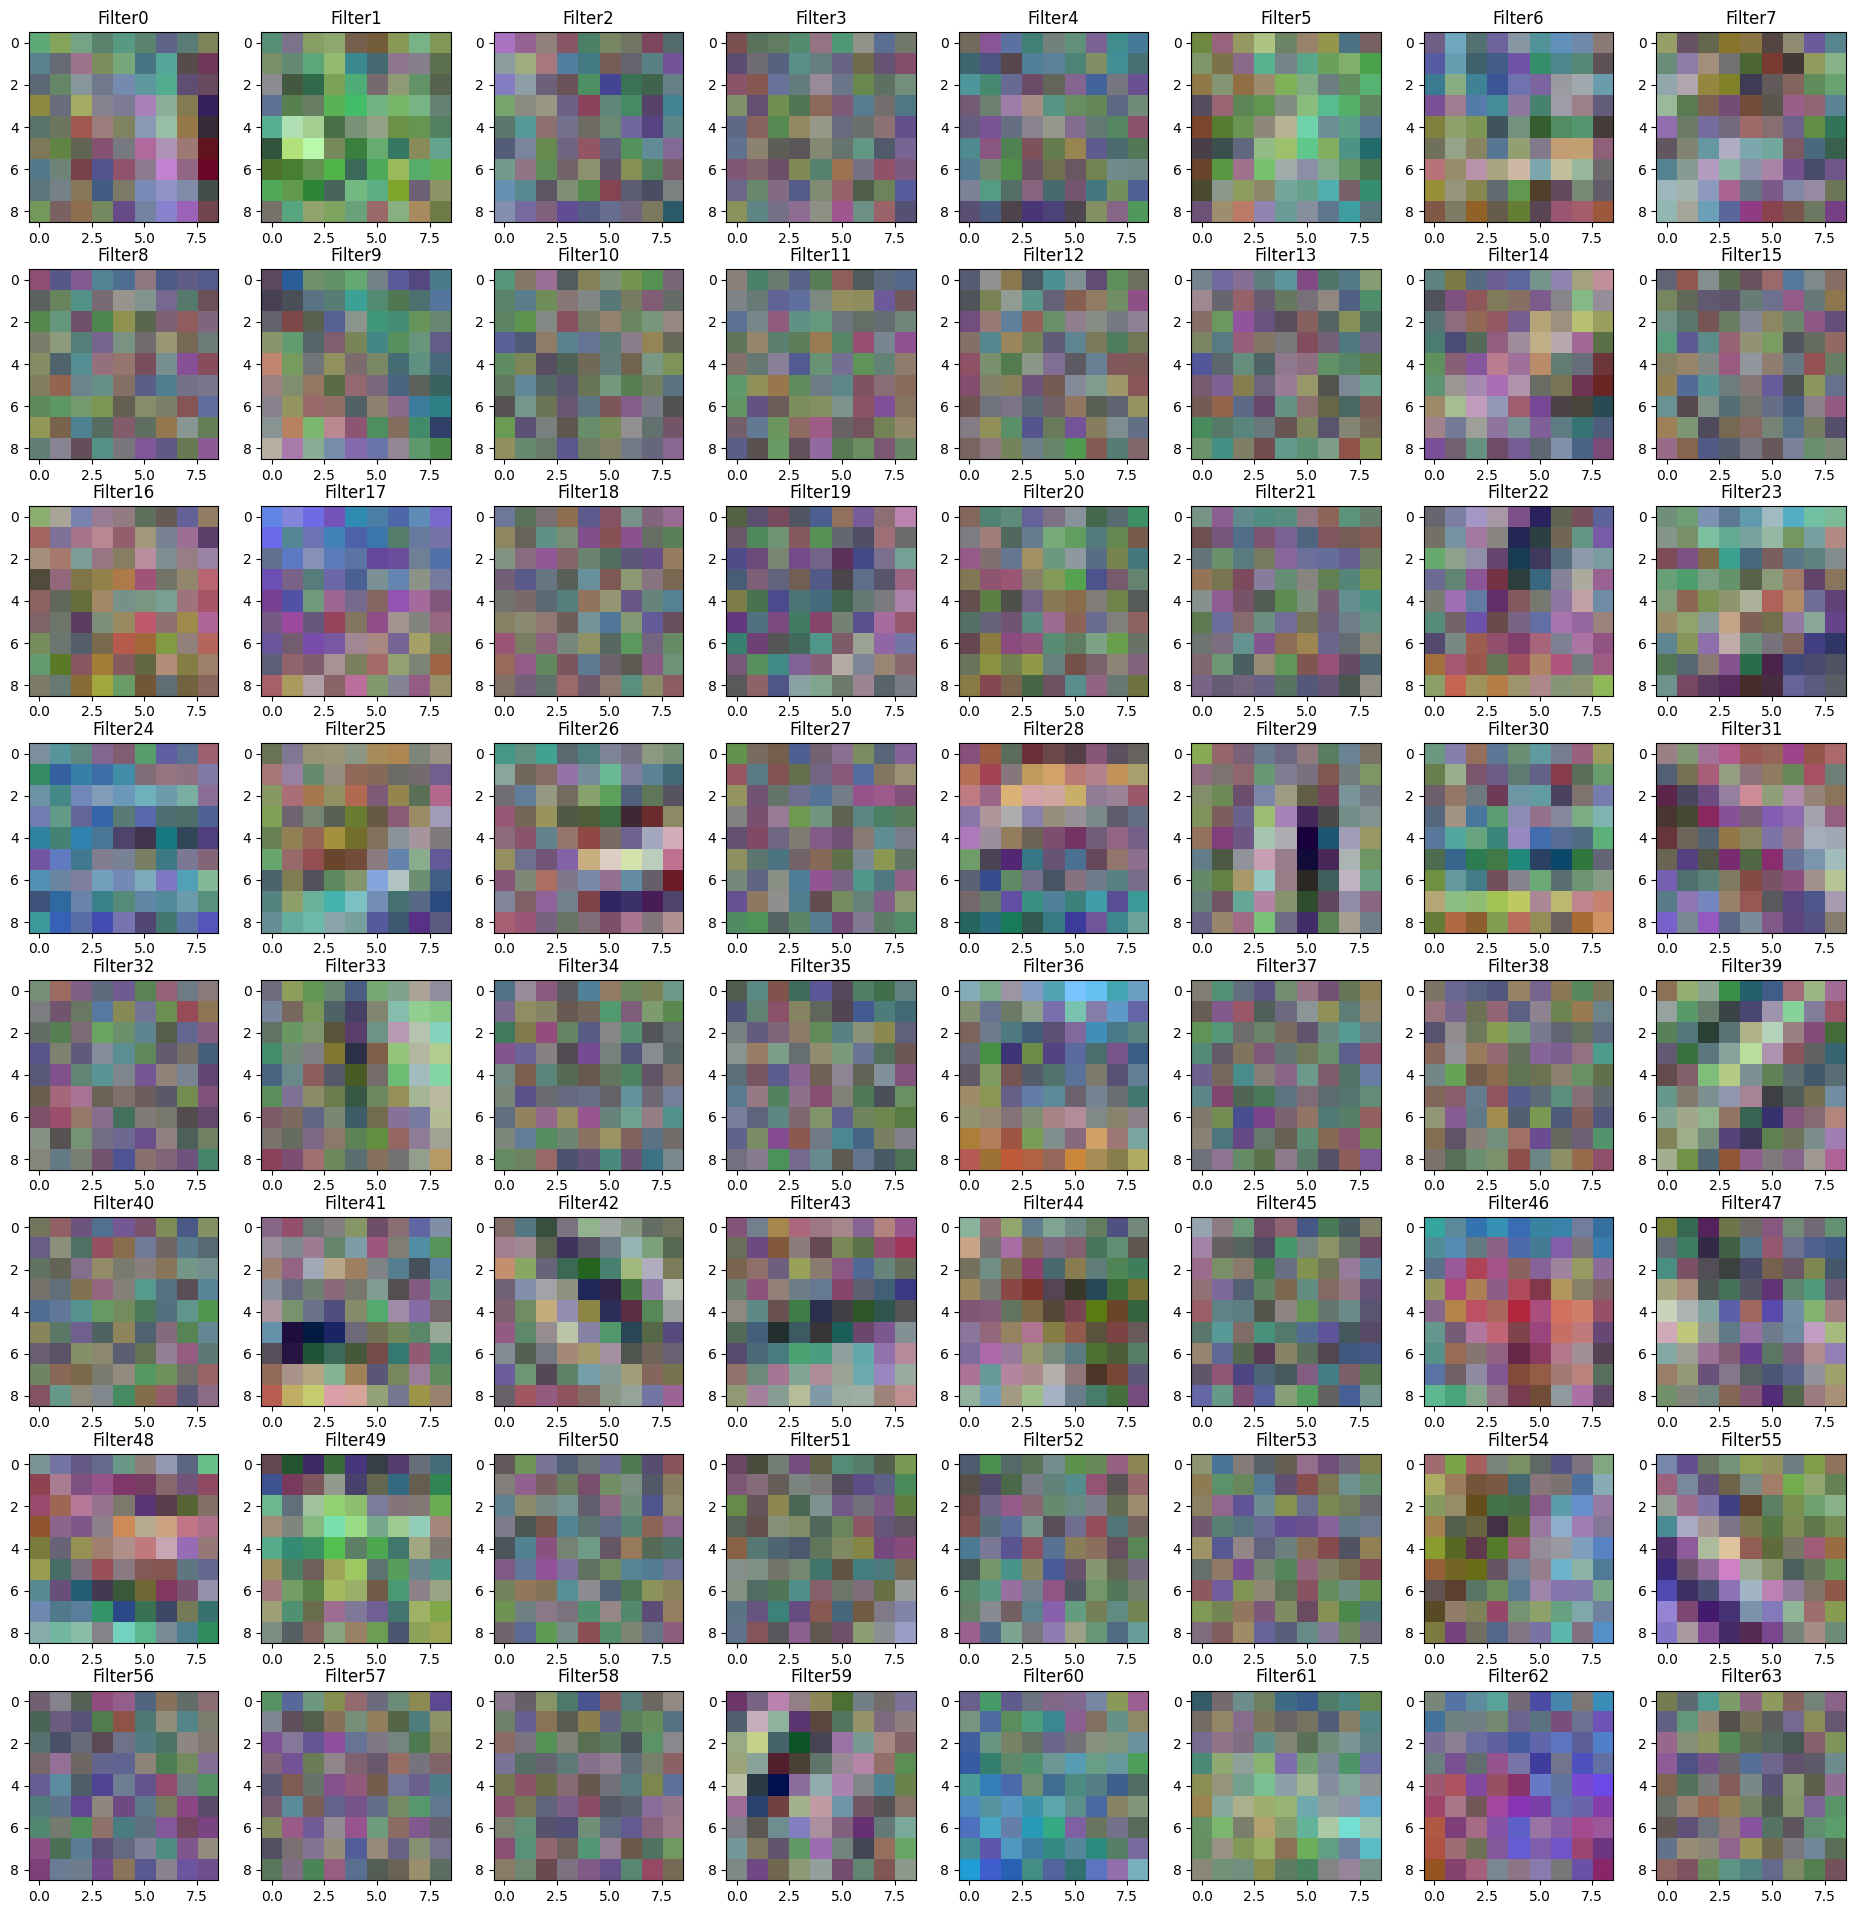

In [26]:
from sklearn.preprocessing import MinMaxScaler
cnn11 = classifier.layers[1].name # get the name of the 1st convolutional layer
w =classifier.get_layer(name=cnn11).get_weights()[0] # get the filters
wshape = w.shape # save the original shape
# we will scale to [0,1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(w.reshape(-1,1))
w = scaler.transform(w.reshape(-1,1))
w = w.reshape(wshape)
# we will display them 8x8
fig,axs = plt.subplots(8,8,figsize=(24,24))
fig.subplots_adjust(hspace=.25, wspace=.001)
axs = axs.ravel()
for i in range(w.shape[-1]):
  #we will reshape to a 3D (RGB) image shape and display
  h=np.reshape(w[:,:,:,i],(9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter'+str(i))

Gabor filters